![picture](https://drive.google.com/uc?export=view&id=1-HwoOx645-DW51QsJLKE1FzvIXVyKQqj)

#Machine Intelligence and Brain Research
*Center for Computational Brain Research, Indian institute of Technology Madras*





#Week 2 Introduction to Machine Learning

<b> Introduction</b>
<p><strong>Welcome!</strong> Now that you have an understanding of the Python programming language, it is time to get introduced to Machine Learning principles with Python. In this tutorial, you will be introduced to  like types of learning and some examples of the types.</p> 

Estimated time of Completion = 2 hrs

##What is Machine Learning?

Machine Learning (ML) is the study of algorithms that improve with experience (using data), to make predictions on unseen data-points without explicit logic (telling the algorithm what to do step by step to solve the problem).

## Machine Learning Paradigms

Not all ML problems are the same. Problems are differentiated by the nature of data used for training and predictions.

The different ML paradigms are as follows:

1. Supervised Learning: The system is fed input-output pairs (labelled data) to learn the function mapping the inputs to the outputs. If the outputs are continuous in nature (e.g. predicting rainfall levels based on weather), it is a regression problem. Otherwise, if the predictions are drawn from a finite set of outputs (e.g. predicting if the picture is a cat or a dog), it is a classifcation problem.

2. Unsupervised Learning: No output (unlabelled data) is utilized, rather this paradigm of learning involves finding inherent patterns in the dataset. 

3. Semisupervised Learning: The paradigm utilizes little labelled data and majority unlabelled data. For example, the most relevant data can be found with unsupervised learning, and predictions can be learned with a supervised system.

4. Reinforcement Learning: Similar to Supervised Learning, this paradigm involves learning the mapping of inputs to outputs. However, no output data is provided. The problem is one of agents and environments, where the agent observes the environment's state (input) and chooses the optimal action (output), which produces a reward. The objective of the agent is to maximize the reward.

It is beyond the scope of this tutorial to explore all the paradigms and its methods. You will be introduced to supervised and unsupervised learning, but feel free to explore the rest using the links at the end of the notebook.

## Imports

In [2]:
%matplotlib inline
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_regression, make_classification, load_breast_cancer, load_boston, fetch_lfw_people, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import random

## Supervised Learning

A common practice in supervised learning is to split the dataset train and test data.

Train Data: It is used as 'experience' to improve the model. The data is used by the model to learn the weights and biases (i.e. the mapping function from inputs to outputs).

Test Data: It is used to evaluate the model learned from the train data. Evaluation is done to ensure the model is not [overfitting](https://en.wikipedia.org/wiki/Overfitting), a common problem in Machine Learning.

### Classification: Logistic Regression

#### Theory

Despite its name, Logistic Regression is a classification algorithm. The crux of Logistic Regression is that it looks at the data to learn a 'decision boundary' to seperate the two different classes of outputs.

In this tutorial, the logistic model utilizes a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) to predict a binary output (e.g. 0/1, True/False, Dog/Cat etc). Although, there are many alternatives that can be used.

Let us first create a dataset (200 points) with two different classes. X (the inputs) are the coordinate points plotted below. y (the outputs 0/1) are classified by their different colour. 

Although there is some overlap between the two classes, we can see a pretty noticeable decision boundary between the two classes of points. Now let us try to make the Logistic Regression algorithm learn the decision boundary.

In [ ]:
# Create two clusters of points
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Let us first create an instance of the Logistic Regression model, and train it on the first 150 points. Then we use the trained model on the last 50 points to generate predictions.

It is generally good practice to shuffle data before splitting it into train and test to ensure data is properly distrubuted (although we don't do it here because the data is randomly generated).

In [5]:
lgR = LogisticRegression().fit(X[:150], y[:150]) #Create Logistic Regression Model and fit train data
predictions = lgR.predict(X[150:]) # Call Logistic Regression model to predict on test data

Now let us compare the predictions to the ground-truth (real) values to see how many correct predictions we made, and generate an accuracy score.

In [ ]:
correct = wrong = 0
for i in predictions == y[150:]:
  if i == True:
    correct += 1
  else:
    wrong += 1

print("There are {} correct predictions and {} wrong predictions out of {} total predictions, the accuracy of the classifier is {}" \
      .format(correct, wrong, correct+wrong, correct/(correct+wrong)))

Alternatively, we can just use the score function of the model to get the accuracy

In [7]:
print("The accuracy of the classifier is", lgR.score(X[150:], y[150:]))

The accuracy of the classifier is 0.88


Now let us plot the decision boundary. 

Note: It is possible to visualize our decision boundary because our input data is two dimensional. However, if the input is in more than 3 dimensions, it becomes unintuitive to visualize this multidimensional boundary.

In [8]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01] #grid size
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgR.predict_proba(grid)[:, 1].reshape(xx.shape)

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[150:,0], X[150:, 1], c=y[150:], s=50, #test data plot
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

As you can see, despite some misclassifications, our Logistic Regression model outputs a decision boundary which does a great job of distinguishing between the two classes.

#### Test

Now it's your turn! Try to apply Logistic Regression on the breast_cancer dataset. Use the input data to try and predict if the cancer is malignant or benign. 

In [ ]:
#Loading Breast Cancer dataset
data = load_breast_cancer()

In [ ]:
#visualize structure of data
data

In [ ]:
#Cleaner representation of data structure with pandas DataFrame
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Check data is in correct format, there ar no unecessary variables
df.info()

Feature Scaling is a common preprocessing step. It is used to speed up the learning in Machine Learning algorithms by ensuring all inputs are in comparable scales.

We fit all the data in a column between 0 and 1. Try to implement this yourself. Here is the forumla.

![picture](https://drive.google.com/uc?id=1ExToNs-gOQoeGtavrWyJvbP3NNZGiYwU)

In [ ]:
#Enter code to normalize df here
#normalized_df = 

Double-click __here__ for the solution.

<!-- The answer is below:

normalized_df=(df-df.min())/(df.max()-df.min())

-->

In [ ]:
#Check normalized df
normalized_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
#Genarate Dataset
X,y = normalized_df.values.tolist(), data.target

In [ ]:
#Split with 80-20 split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

Now try fitting the data into the Logistic Regression model. Then, make predictions on the test data and compare it to the actual values to generate the accuracy score.

In [ ]:
#Enter code here

Double-click __here__ for the solution.

<!-- The answer is below:

lgR = LogisticRegression().fit(X_train, y_train)
accuracy = lgR.score(X_test, y_test)
print("The Accuracy of the classifier is", accuracy)

-->

Great! Now you have an intuition of Classification, and have applied it to make predicitions about brest cancer. Let us move on to the next topic: Regression.

### Regression: Linear Regression

#### Theory

Linear regression attempts to model the relationship between two variables by fitting a linear equation (in the form y = mx + c) to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

The linear equation is calculated by minimizing the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This sum all of the squared errors is minimized for the optimal line.

The "goodness in fit" of the Linear Regression model is evaluated through R^2. This statistic indicates the percentage of the variance in the dependent variable (outputs) that the independent variables (inputs) explain collectively. R-squared measures the strength of the relationship between the model and the dependent.

R^2 is measured between 0 and 1. The higher the R^2 value the better the fit.



Similar to Logistic Regression, let us generate some random data and run the Linear Regression model on the data to find the best fitting line. We will also plot the results and evaluate them with the R^2 metric discussed.

In [ ]:
X, y = make_regression(n_samples=150,#number of samples
                                      n_features=1,#number of features
                                      noise=10,#bias and standard deviation of the guassian noise
                                      random_state=1) #set for same data points for each run

plt.scatter(X,y)

In [ ]:
liR = LinearRegression().fit(X[:100], y[:100]) #First 100 datapoints for train data
y_preds = liR.predict(X[100:])

plt.scatter(X[100:], y[100:]) #Last 50 datapoints for test data
plt.plot(X[100:], y_preds,color='k')

plt.show()

In [ ]:
print("The R^2 value is ", r2_score(y_preds, y[100:]))

The R^2 value is  0.8988632342265217


#### Test

Now try to Explore the Boston Housing dataset to get a better understanding of that data. After you're comfortable with the data, build a price prediction model with Linear Regression from scratch and evaluate its performance.

In [ ]:
data = load_boston()

In [ ]:
#Enter your code here

Double-click __here__ for the solution.

<!-- The answer is below:

#Data Frame for inutition of data
df = pd.DataFrame(data.data)
df.columns = data.feature_names

#Normalize data
normalized_df=(df-df.min())/(df.max()-df.min())
X,y = normalized_df.values.tolist(), data.target

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

#Fir into Linear Regression Model and 
liR = LinearRegression().fit(X_train, y_train)
y_preds = liR.predict(X_test)

#R^2 value
print("The R^2 value is ", r2_score(y_preds, y_test))

-->

## Unsupervised Learning

### Clustering
Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

### K-means Clustering

K-means clustering is a simple and elegant approach for partitioning a
data set into K distinct, non-overlapping clusters. To perform K-means
clustering, we must first specify the desired number of clusters K; then the
K-means algorithm will assign each observation to exactly one of the K
clusters.

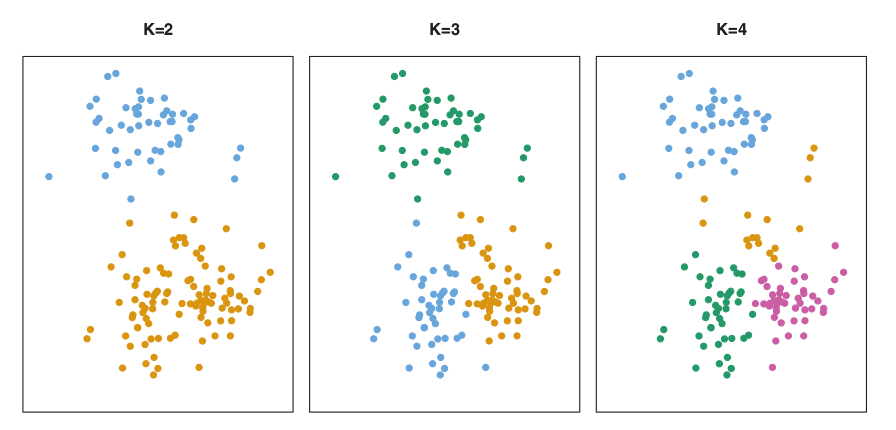

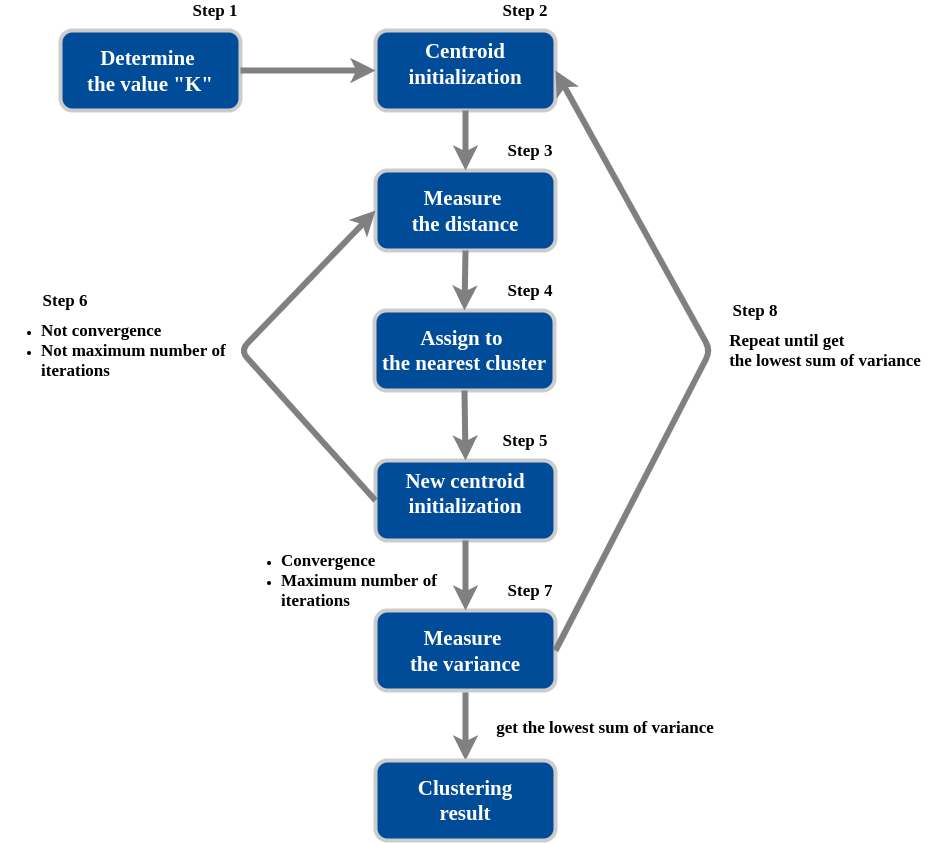

#### Theory

In [ ]:
X, y = make_blobs(n_samples=100, centers=4, random_state=101)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
## Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
## Clustering with KMeans, notice we don't use the labels y anywhere in the code below

kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled) # Fitting data into model
labels = kmeans.labels_

plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], color = 'r', s=50) #Plotting each of the clusters
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], color = 'g', s=50)
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], color = 'b', s=50)
plt.scatter(X_scaled[labels == 3, 0], X_scaled[labels == 3, 1], color = 'y', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);

plt.show()

#### Test
Now try doing the same thing with the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [ ]:
data = load_iris()

In [ ]:
#Enter Code Here

Double-click __here__ for the solution (Cell #1).

<!-- The answer is below:

#Cleaner representation of data structure with pandas DataFrame
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['species'] = data.target
df['species'].replace({0: "setosa", 1: "versicolor", 2:"virginica"}, inplace=True)
df.sample(5)

-->

Double-click __here__ for the solution (Cell #2).

<!-- The answer is below:

#Visualizing differences in distributions of different attributes
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3);
plt.show() # As you can see from the plot, versicolor and virginica don't have a differentiable features
-->

Double-click __here__ for the solution (Cell #3).

<!-- The answer is below:

## Clustering with KMeans, notice we don't use the labels y anywhere in the code below

X = data.data
print(X[0])
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color = 'r', s=50, label='setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color = 'g', s=50, label='versicolour')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color = 'b', s=50, label='virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);

plt.legend()

-->

Double-click __here__ for the solution (Cell #4).

<!-- The answer is below:

#3D representation of clustering
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color = 'r', s=50, label='setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color = 'g', s=50, label='versicolour')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color = 'b', s=50, label='virginica')

#Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100);
plt.legend()

-->

### Dimensionality Reduction

### Principal Component Analysis
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. 

Consider the following 200 points.

In [ ]:
# Initializing a random number generator (rng)
rng = np.random.RandomState(1)

# Genrating the data using rng - 200 points with x and y dimension
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# Plotting the points
plt.scatter(X[:, 0], X[:, 1], c = 'mediumblue', alpha = 1)
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. Rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. We can compute this using Scikit-Learn's PCA estimator.

In [ ]:
# Making an object to perform PCA - n_components is the number of components to keep
pca = PCA(n_components = 2)

# Fit the principal component analyzer to the training data
pca.fit(X)

# The analyzer now has values for the principal components and the fraction of variance explained by them
for i, (vector, variance) in enumerate(zip(pca.components_, pca.explained_variance_), 1):
    print(f'Principal Component {i} - {np.around(vector, 5)}, Explained Variance - {round(100 * variance, 5)}%')

Principal Component 1 - [-0.94446 -0.32863], Explained Variance - 76.25315%
Principal Component 2 - [-0.32863  0.94446], Explained Variance - 1.84779%


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.

In [ ]:
# Function for drawing the principal components
def draw_vector(v0, v1, ax = None):
    
    ax = ax or plt.gca()
    arrow_props = {'arrowstyle': '->', 'linewidth': 2, 'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}
    ax.annotate('', v1, v0, arrowprops = arrow_props)

# Making the plot
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = 'mediumblue', alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

In [ ]:
# Making a dictionary for font properties for axes labels and title
fontdict = {'family':'serif', 'color':'black', 'weight':'normal', 'size': 14}

# Initializing the two subplots
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
fig.subplots_adjust(wspace = 0.3)

# Making the plot with X and Y axis
ax[0].scatter(X[:, 0], X[:, 1], c = 'mediumblue', alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax = ax[0])
ax[0].axis('equal')
ax[0].set_xlabel('X', fontdict = fontdict, labelpad = 10)
ax[0].set_ylabel('Y', fontdict = fontdict, labelpad = 10)
ax[0].set_title('Input', fontdict = fontdict, pad = 10)

# Making the plot taking the prinicpal components as the axes
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c = 'mediumblue', alpha = 0.2)
draw_vector([0, 0], [0, 3], ax = ax[1])
draw_vector([0, 0], [3, 0], ax = ax[1])
ax[1].axis('equal')
ax[1].set(xlim = (-5, 5), ylim = (-3, 3.1))
ax[1].set_xlabel('Component 1', fontdict = fontdict, labelpad = 10)
ax[1].set_ylabel('Component 2', fontdict = fontdict, labelpad = 10)
ax[1].set_title('Principal Components', fontdict = fontdict, pad = 10);

### PCA for dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [ ]:
# Setting the number of components to keep to 1
pca = PCA(n_components = 1)

# Fitting the analyzer to the data
pca.fit(X)

# Transforming the data to get a reduced dimension
X_pca = pca.transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (200, 2)
Transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

In [ ]:
# Taking the inverse transform of the one dimesnional data
X_new = pca.inverse_transform(X_pca)

plt.figure(figsize = (10, 6))
# Plotting the original data
plt.scatter(X[:, 0], X[:, 1], c = 'mediumblue', alpha = 0.2)
# Plotting the projected data
plt.scatter(X_new[:, 0], X_new[:, 1], c = 'mediumblue', alpha = 0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## Bonus Content: Eigenfaces (Extenstion of PCA for Dimensionality Reduction)

The Bonus Content (and question) are not necessary, but you may choose to complete these sections if you are interested to learn more about the topics presented.

In [ ]:
# Fetching the data for faces
faces = fetch_lfw_people(min_faces_per_person = 60)

print(faces.target_names)
print(faces.images.shape)

Let’s visualize some images from the dataset. You can see that each image has a complete face, and the facial features like eyes, nose, and lips are clearly visible in each image. Now that we have our dataset ready, let’s compress it.

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (10, 3),
                       subplot_kw = {'xticks': [], 'yticks': []},
                       gridspec_kw = {'wspace': 0.1})

for i in range(5):
    ax[i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use PCA with a randomized algorithm — it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). 

We will keep the top $k$ templates (principal components) and drop the remaining. But, how many templates shall we keep? If we keep more templates, our reconstructed images will closely resemble the original images but we will need more storage to store the compressed data. If we keep too few templates, our reconstructed images will look very different from the original images.

For this notebook, we will keep $k=150$.

In [ ]:
pca = PCA(150, svd_solver = 'randomized', random_state = 42)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces").

In [ ]:
fig, axes = plt.subplots(3, 8, figsize = (10, 5), 
                         subplot_kw = {'xticks': [], 'yticks': []}, 
                         gridspec_kw = {'hspace': 0.1, 'wspace': 0.06})

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving.

In [ ]:
plt.figure(figsize = (7, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontdict = fontdict, labelpad = 10)
plt.ylabel('Cumulative Explained Variance', fontdict = fontdict, labelpad = 10);

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components.

In [ ]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
fig, ax = plt.subplots(2, 10, figsize = (16, 4),
                       subplot_kw = {'xticks': [], 'yticks': []},
                       gridspec_kw = {'hspace': 0.1, 'wspace': 0.1})

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
    
ax[0, 0].set_ylabel('Full-dim\nInput', fontdict = fontdict, labelpad = 10)
ax[1, 0].set_ylabel('150-dim\nReconstruction', fontdict = fontdict, labelpad = 10);

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. Although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

You can learn more about the mathematics of PCA for 2D images <a href='https://towardsdatascience.com/face-dataset-compression-using-pca-cddf13c63583'>here</a>.

## Bonus Question: Implement Logistic Regression

This question is of a higher difficulty than the rest of the tutorial, and you will need a thorough understanding of Logistic Regression to attempt this question. It is recommended you read through this [chapter](https://web.stanford.edu/~jurafsky/slp3/5.pdf) to get acquianted with the theory.

Now let's manually implement Logistical Regression to get a bet understanding of how it works. First we'll implement individual components, and finally build towards the training.

Like before, let us create a random dataset with two distinct classes.

In [ ]:
# Create two clusters of points
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

#### Sigmoid function

Implement the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) previously discussed. You may use `np.exp()` for the exponential function.

In [ ]:
# Function to calculate Sigmoid
def sigmoid(val):
  #Enter Code Here
  pass

Double-click __here__ for the solution.

<!-- The answer is below:

def sigmoid(val):
  return 1.0/(1 + np.exp(-val))

-->

#### Loss function

Next, we will implement the Binary Cross-Entropy Loss function.

In [ ]:
#Function to calculate loss
def loss(y, y_pred):
  
  # y: Numpy Array of all correct Outputs.
  # y_pred: Numpy Array of predicted Outputs.

  #Enter Code Here
  pass

Double-click __here__ for the solution.

<!-- The answer is below:

def loss(y, y_pred):

  # y: Numpy Array of all correct Outputs.
  # y_pred: Numpy Array of predicted Outputs.
  
  return -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))

-->

#### Gradient Descent

We also have to implement the gradients function to calculate the gradients of the weights and biases w.r.t loss. These gradients are used to make updates to the weights and biases, bringing the function closer to the minimum every epoch.

You may use the outline provided in the comments in the code.

In [ ]:
#Function to calculate and return gradients
def gradients(X, y, y_pred):
  
  # X: Numpy Array of all Inputs.
  # y: Numpy Array of all correct Outputs.
  # y_pred: Numpy Array of predicted Outputs.
  
  # Fill code in each of the sections below

  # 1. Calculate number of training examples
  pass
  
  # 2. Calculate Gradient of loss with respect to weights.
  pass
  
  # 3. Calculate Gradient of loss with respect to bias.
  pass

  # 4. Return both gradients
  pass
  

Double-click __here__ for the solution.

<!-- The answer is below:

def gradients(X, y, y_pred):
  
  # X: Numpy Array of all Inputs.
  # y: Numpy Array of all correct Outputs.
  # y_pred: Numpy Array of predicted Outputs.
  
  # 1. Calculate number of training examples
  num_training = X.shape[0]
  
  # 2. Calculate Gradient of loss with respect to weights.
  dw = (1/num_training)*np.dot(X.T, (y_pred - y))
  
  # 3. Calculate Gradient of loss with respect to bias.
  db = (1/num_training)*np.sum((y_pred - y)) 

  # 4. Return both gradients

  return dw, db

-->

#### Normalization

Next, have to perform z-score normalization over each of the features.

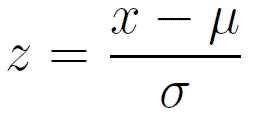


In [ ]:
#normalize X based on its features and return the normalized X
def normalize(X):
    
  # X: Numpy Array of all Inputs.

  # Fill code in each of the sections below

  # 1. Calculate the number of features of the input
  pass

  # 2. Normalize over all the features of X.
  pass

  # 3. Return Normalized X
  pass

Double-click __here__ for the solution.

<!-- The answer is below:

def normalize(X):
    
  # X: Numpy Array of all Inputs.

  # Fill code in each of the sections below

  # 1. Calculate the number of features of the input
  num_features = X.shape[1]
  
  # 2. Normalize over all the features of X.
  for i in range(num_features):
    X = (X - X.mean(axis=0))/X.std(axis=0)

  # 3. Return Normalized X
  return X

-->

#### Training and Prediction

Lastly, we have to train the model over the epochs. Some of the code has already been written for you, fill in the rest of the steps; the directions have been provided in detail as comments in the code.

In [ ]:
def train(X, y, epochs, lr):
  
  # X: Numpy Array of all Inputs.
  # y: Numpy Array of all correct Outputs.
  # epochs: Number of iterations of training.
  # lr: Learning rate.

  #Fill the numbered sections with with the correct code
      
  # Calculate number of training examples and number of features 
  num_training, num_features = X.shape
  
  # Initialize weights and bias to zeros.
  w = np.zeros((num_features,1))
  b = 0
  
  # Reshape y to a numpy array of shape (num_training, 1) and Normalize inputs.
  y = y.reshape(num_training,1)
  x = normalize(X)
  
  # Create an empty list of store loss.
  losses = []
  
  # Iterate through epochs
  for epoch in range(epochs):

    # 1. Get predictions by finding dot product of (X,w), adding the bias to dot product and pass it through the sigmoid function.
    pass
    
    # 2. Find the gradients of loss w.r.t parameters with the function we previously wrote.
    pass
    
    # 3. Update the parameters based on learning rate and gradient.
    pass
    
    # 4. Calculate loss with the function we previously wrote and append it in the losses list.
    pass
      
  # Return weights, bias and losses.
  return w, b, losses

Double-click __here__ for the solution.

<!-- The answer is below:

def train(X, y, epochs, lr):
  
  # X: Numpy Array of all Inputs.
  # y: Numpy Array of all correct Outputs.
  # epochs: Number of iterations of training.
  # lr: Learning rate.

  #Fill the numbered sections with with the correct code
      
  # Calculate number of training examples and number of features 
  num_training, num_features = X.shape
  
  # Initialize weights and bias to zeros.
  w = np.zeros((num_features,1))
  b = 0
  
  # Reshape y to a numpy array of shape (num_training, 1) and Normalize inputs.
  y = y.reshape(num_training,1)
  x = normalize(X)
  
  # Create an empty list of store loss.
  losses = []
  
  # Iterate through epochs
  for epoch in range(epochs):

    # 1. Get predictions by finding dot product of (X,w), adding the bias to dot product and pass it through the sigmoid function.
    y_pred = sigmoid(np.dot(X, w) + b)
    
    # 2. Find the gradients of loss w.r.t parameters.
    dw, db = gradients(X, y, y_pred)
    
    # 3. Update the parameters based on learning rate and gradient.
    w -= lr*dw
    b -= lr*db
    
    # 4. Calculate loss and append it in the losses list.
    l = loss(y, sigmoid(np.dot(X, w) + b))
    losses.append(l)
      
  # Return weights, bias and losses(List).
  return w, b, losses

-->

The function for predict has already been completed! Now let's run the whole code to see if it works!

In [ ]:
def predict(X):
    
    # X: List of all Inputs.
    
    # 1. Normalize the inputs.
    x = normalize(X)
    
    # 2. Make predictions with model.
    preds = sigmoid(np.dot(X, w) + b)
    
    # 3. Empty List to store predictions.
    pred_class = []

    # if y_pred >= 0.5, assume prediction = 1, else prediction = 0
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    #4. Convert and return list of predictions as np array
    return np.array(pred_class)

In [ ]:
# Training 
w, b, l = train(X, y, epochs=2000, lr=0.2)

# Plotting Decision Boundary
x1 = [min(X[:,0]), max(X[:,0])]
m = -w[0]/w[1]
c = -b/w[1]
x2 = m*x1 + c

# Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(x1, x2, 'r-')

If you've got the code right, the output should look something like this! 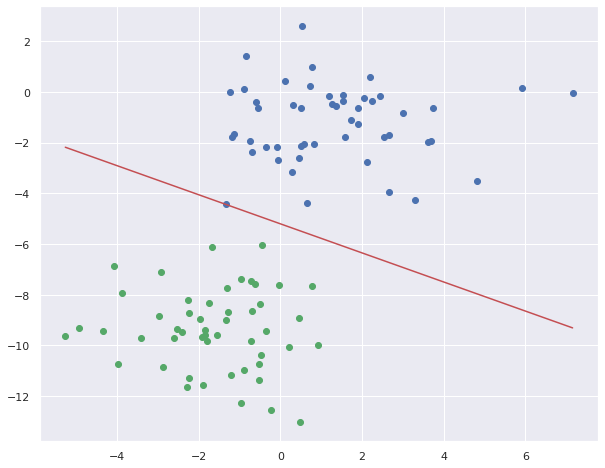

Congratulations! You've implemented your own Classifier from scratch! You can pass in different data from the previous datasets we've discussed to see if it still works!

## Additional Resources for Topics Covered in tutorial

Semisupervised Learning:https://github.com/yassouali/awesome-semi-supervised-learning

Reinforcement Learning: https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf

Logistic Regression: https://web.stanford.edu/~jurafsky/slp3/5.pdf

## References

1. https://scikit-learn.org/stable/user_guide.html
2. https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

##Prepared By Kushal Sai Gunturi, Jasraj Singh, Approved by Dr Jaikishan Jayakumar
All rights reserved